## Random possibly useful plotting explorations.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import glob
import itertools
import ipyparallel as ipp
import pandas as pd
import numpy as np
import os
import seaborn as sns
from IPython.display import display

import MESS
from MESS.util import set_params

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


## Andrews Curves (pandas)
Pandas has a kind of fun plotting thing called "Andrews Curves".

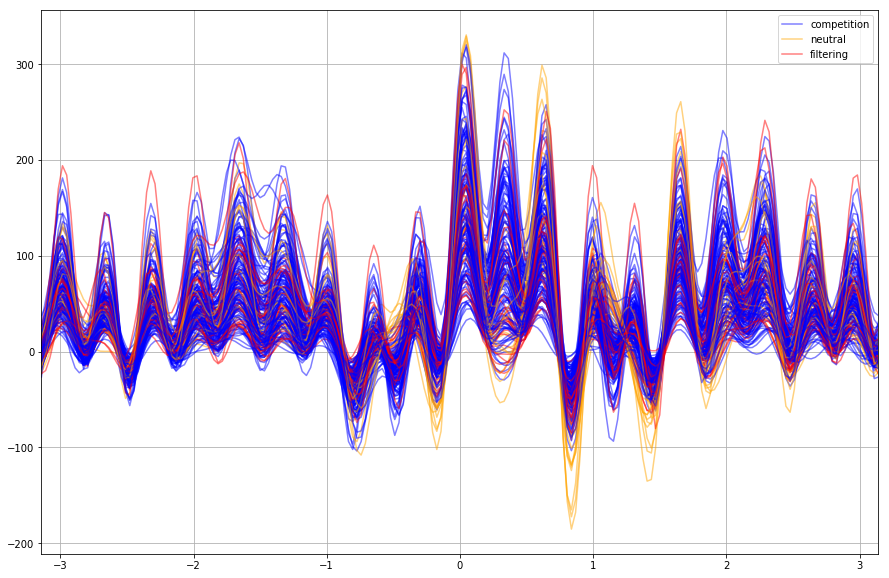

In [4]:
from pandas.plotting import andrews_curves
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
sim_df = pd.read_csv(simfile, sep="\t", header=0)


stats = MESS.stats.feature_sets()["all"]
plt.figure(figsize=(15, 10))
#tmp_df = sim_df[sim_df["_lambda"] > 0.85]
#tmp_df = sim_df[sim_df["generations"] < 10]

time = "generation"
select = 10
tol = 0.1
tmp_df = sim_df[(sim_df[time] < (select * (1 + tol))) & (sim_df[time] > (select * (1 - tol)))]


andrews_curves(tmp_df[stats + ["community_assembly_model"]][:500],\
               'community_assembly_model', color=["blue", "orange", "red"], alpha=0.5)

In [2]:
lambdas = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
simfile = "/home/isaac/Continuosity/MESS/analysis/figure5-sims/SIMOUT.txt"
sim_df = pd.read_csv(simfile, header=0, sep="\t")
sim_df

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,250,500000,2.0,0.7,2.0,0.02676,0.0,neutral,point_mutation,0.0,3041,570.0,2942.0,0.00155,0.00287,966.0,0.94086,0.00160,0.00375,0.58824,-0.84042,65.0,14.24472,7.30576,5.52449,4.77490,23.29364,17.49563,13.67382,11.41103,0.00060,0.00098,3.00644,12.42661,0.00000,0.00097,0.03804,0.02896,0.06628,-1.56031,0.03211,0.06614,0.0,21.05220,11.54010,8.87926,7.73223,-1.68426,3.00312,1.80240,4.20165,-2.51892,2.56642,-2.65502,3.18041,2.33030,6.04429,-3.83588,1.97522,-0.97076,0.17730,0.52790,1.84264,-1.31696,-0.59121,0.02672,0.35621,0.05547,-0.30198,0.06503,0.04088,41.0,13.0,5.0,3.0,2.0,0.0,0.0,0.0,0.0,1.0
1,250,500000,2.0,0.7,2.0,0.00607,0.0,neutral,point_mutation,0.0,4511,570.0,9466.0,0.00517,0.00183,189.0,0.47201,0.00509,0.00246,0.58824,-1.43628,117.0,10.65045,3.05727,2.34517,2.13412,49.41923,39.17596,33.06670,29.35757,0.00082,0.00115,1.98579,4.13073,0.00035,0.00117,0.03068,0.01570,-0.57234,-0.72594,0.03526,0.02018,0.0,24.68657,11.67343,9.35103,8.39183,-1.33886,1.82385,1.52073,2.45704,-1.91155,1.97892,-1.77905,1.52450,2.04701,6.37694,-2.08433,1.18946,-0.44019,-0.29935,0.52629,3.91989,-0.17279,-0.78946,-0.02970,0.31862,0.08426,-0.07154,-0.15468,0.05512,62.0,26.0,12.0,7.0,2.0,1.0,5.0,1.0,0.0,1.0
2,250,500000,2.0,0.7,2.0,0.11716,0.0,filtering,point_mutation,0.0,3074,570.0,8277.0,0.00304,0.00378,34.0,1.00000,0.00324,0.00490,0.58824,3.38778,32.0,1.81253,1.31026,1.23121,1.20335,7.95104,7.18892,6.65164,6.26448,0.00022,0.00041,1.83888,2.40821,0.00000,0.00035,0.01118,0.00456,0.03447,0.14316,0.01193,0.00447,0.0,7.93390,5.47806,4.91552,4.65652,3.34666,0.18048,-3.06385,12.77644,3.36011,0.15316,1.50781,2.38364,-1.56209,1.92037,2.20311,1.52484,-1.83885,2.20316,1.50176,-10.85607,-1.15700,1.37169,-0.08136,0.20245,-0.01467,0.17929,-0.33780,0.14061,23.0,0.0,3.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0
3,250,500000,2.0,0.7,2.0,0.05655,0.0,competition,point_mutation,0.0,6122,570.0,2039.0,0.00317,0.00069,19.0,0.41785,0.00270,0.00162,0.58824,3.62888,20.0,4.37626,2.69134,2.22982,2.05104,6.56331,6.22229,5.97218,5.79230,0.00020,0.00030,1.08414,-0.43175,0.00000,0.00035,0.00283,0.00295,0.69462,-1.23331,0.00114,0.00588,0.0,6.59762,5.05298,4.62467,4.44658,1.96682,5.62680,-0.57094,-1.55461,5.50992,11.02466,-0.21923,4.14664,0.35043,-1.02853,-1.07166,7.38971,-2.18605,-1.48016,0.92137,0.52608,-6.58159,-3.63495,0.11455,0.70389,0.48862,0.38446,-0.21386,0.13710,13.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,2.0
4,250,500000,2.0,0.7,2.0,0.00387,0.0,neutral,point_mutation,0.0,5873,570.0,7087.0,0.00175,0.00259,335.0,0.47114,0.00175,0.00320,0.58824,0.06183,109.0,11.50857,3.39932,2.55229,2.30124,44.02504,32.28898,25.14570,21.17907,0.00069,0.00106,2.91179,10.89280,0.00035,0.00097,0.03234,0.01361,-1.31267,0.37033,0.03772,0.01105,0.0,29.14738,14.66232,11.75516,10.42880,5.28557,2.75129,-1.63275,1.71233,6.26043,1.81204,5.97726,2.08296,-2.50759,6.43554,6.54266,1.10190,0.69169,-0.66833,-0.87484,4.72322,0.28223,-0.71013,0.06694,0.23478,0.08465,-0.22481,-0.22867,0.17051,63.0,

In [19]:
data = MESS.Region("wat", quiet=False, log_files=True)
data.set_param("project_dir", "/home/isaac/Continuosity/MESS/MESS/default_MESS")
ipyclient = ipp.Client(cluster_id="MESS")
print(len(ipyclient))
for l in lambdas:
    print(l)
    data.set_param("generations", l)
    data.run(sims=100, ipyclient=ipyclient, quiet=False)

40
0.05
    Generating 100 simulation(s).
  [####################] 100%  Performing Simulations    | 0:00:12 | 
  [####################] 100% 
    Finished 100 simulations
 0.1
    Generating 100 simulation(s).
  [####################] 100%  Performing Simulations    | 0:00:15 | 
  [####################] 100% 
    Finished 100 simulations
 0.25
    Generating 100 simulation(s).
  [####################] 100%  Performing Simulations    | 0:00:24 | 
  [####################] 100% 
    Finished 100 simulations
 0.5
    Generating 100 simulation(s).
  [####################] 100%  Performing Simulations    | 0:00:40 | 
  [####################] 100% 
    Finished 100 simulations
 0.75
    Generating 100 simulation(s).
  [####################] 100%  Performing Simulations    | 0:01:13 | 
  [####################] 100% 
    Finished 100 simulations
 1
    Generating 100 simulation(s).
  [####################] 100%  Performing Simulations    | 0:02:53 | 
  [####################] 100% 
    Finished

In [34]:
## Use different lambda values if you please
def populate_lambda_dists(megalogs, lambdas=lambdas, abund=False):
    ## Accumulate data
    lambda_dict = {x:[] for x in lambdas}
    tolerance = 0.05

    for f in megalogs:
        ## get lambda

        lamb = float(f.split("/")[-1].split("-")[1])

        for l in lambdas:
            if abs(l - lamb) < tolerance:
                lambda_dict[l].append(f)


    for l in lambdas:
        list_of_df = [pd.read_csv(x).dropna() for x in lambda_dict[l]]
        for i, x in enumerate(list_of_df):
            x.drop(x["Ne_local"].idxmax(), inplace=True)
            list_of_df[i] = x
        if abund:
            lambda_dict[l] = list_of_df
        else:
            lambda_dict[l] = pd.concat(list_of_df)

            
    print([len(x) for x in lambda_dict.values()])
    
    return lambda_dict


def plot_pi_dxys(megalogs):
    lambda_dict = populate_lambda_dists(megalogs)

    from matplotlib.colors import LogNorm

    f, axarr = plt.subplots(2, 3, figsize=(8,4), dpi=300, sharex=True, sharey=True)
    axarr = [a for b in axarr for a in b]
    cmap="jet"
    rang=[[0.001, 0.05], [0, 0.06]]
    for i, k, ax in zip(range(0,6), lambdas, axarr):
        ax.set_title(u"Λ = {}".format(k), fontsize=10)
        _, _, _, im = ax.hist2d(lambda_dict[k]["pi_local"], lambda_dict[k]["dxy"], bins=30, cmap=cmap, norm=LogNorm(), normed=True, range=rang)
    f.text(0.5, 0.01, u"Nucleotide diversity (π)", ha='center', fontsize=13)
    f.text(0.04, 0.5, r"Absolute divergence ($D_{xy}$)", va='center', rotation='vertical', fontsize=13)
    plt.suptitle("Joint distribution of genetic diversity/divergence through time", y=.9999, fontsize=15)
    plt.subplots_adjust(hspace=.25)

    cb_ax = f.add_axes([0.93, 0.12, 0.015, 0.76])
    cbar = f.colorbar(im, cax=cb_ax)

[929, 1873, 1375, 1441, 1513, 1519]


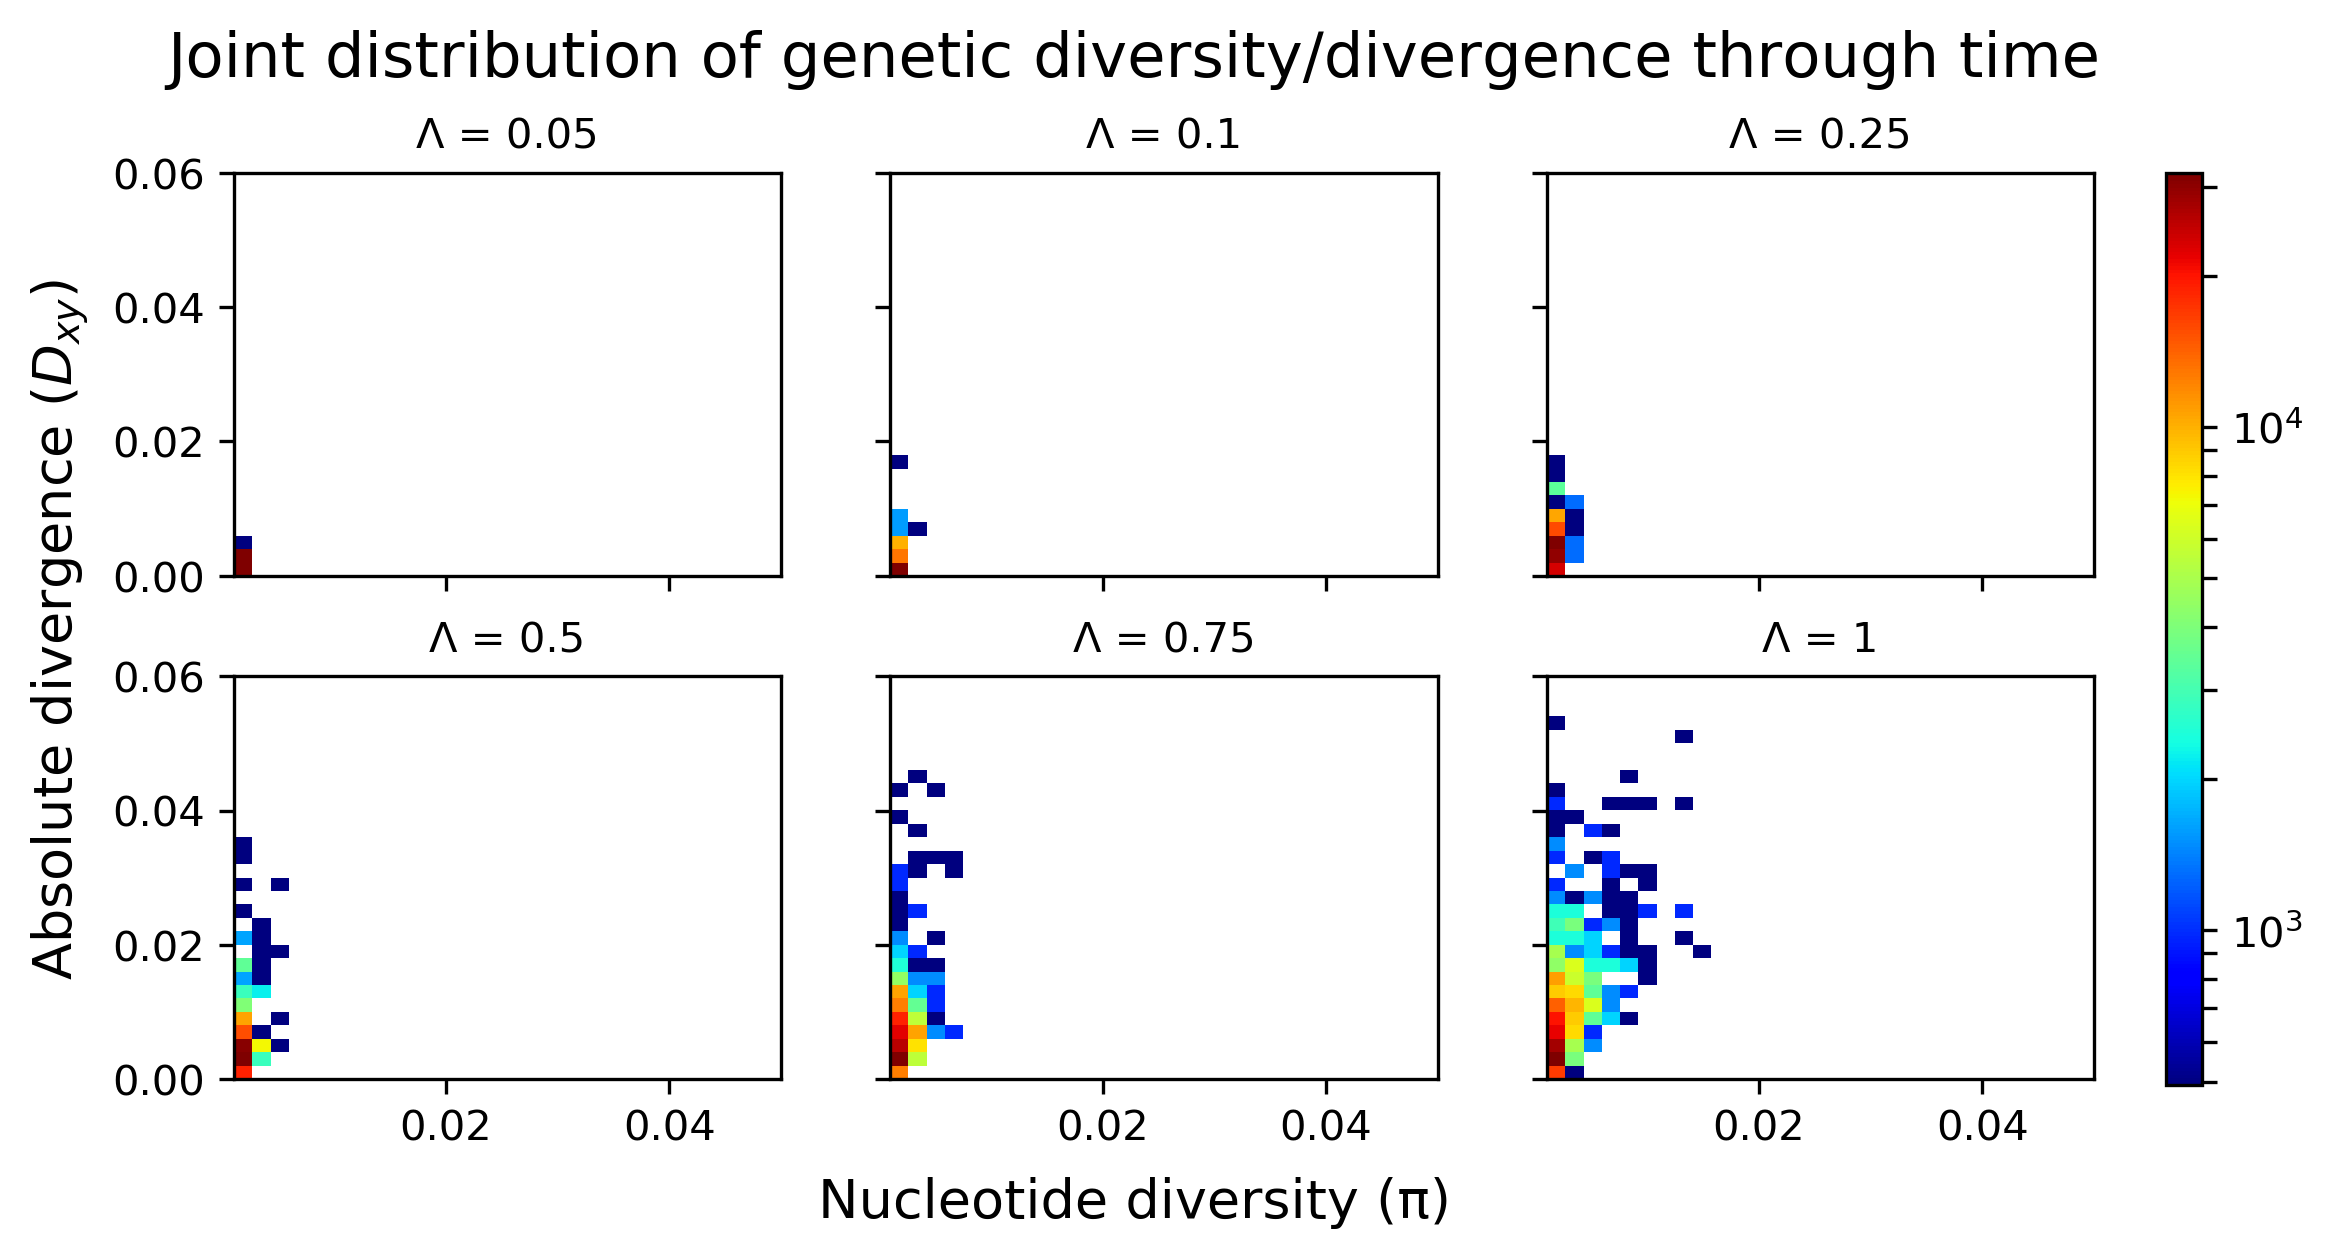

In [24]:
megalogs = glob.glob("/home/isaac/Continuosity/MESS/MESS/default_MESS/*/*megalog.txt")
#print(megalogs[:10])
plot_pi_dxys(megalogs)


[100, 180, 100, 100, 100, 100]


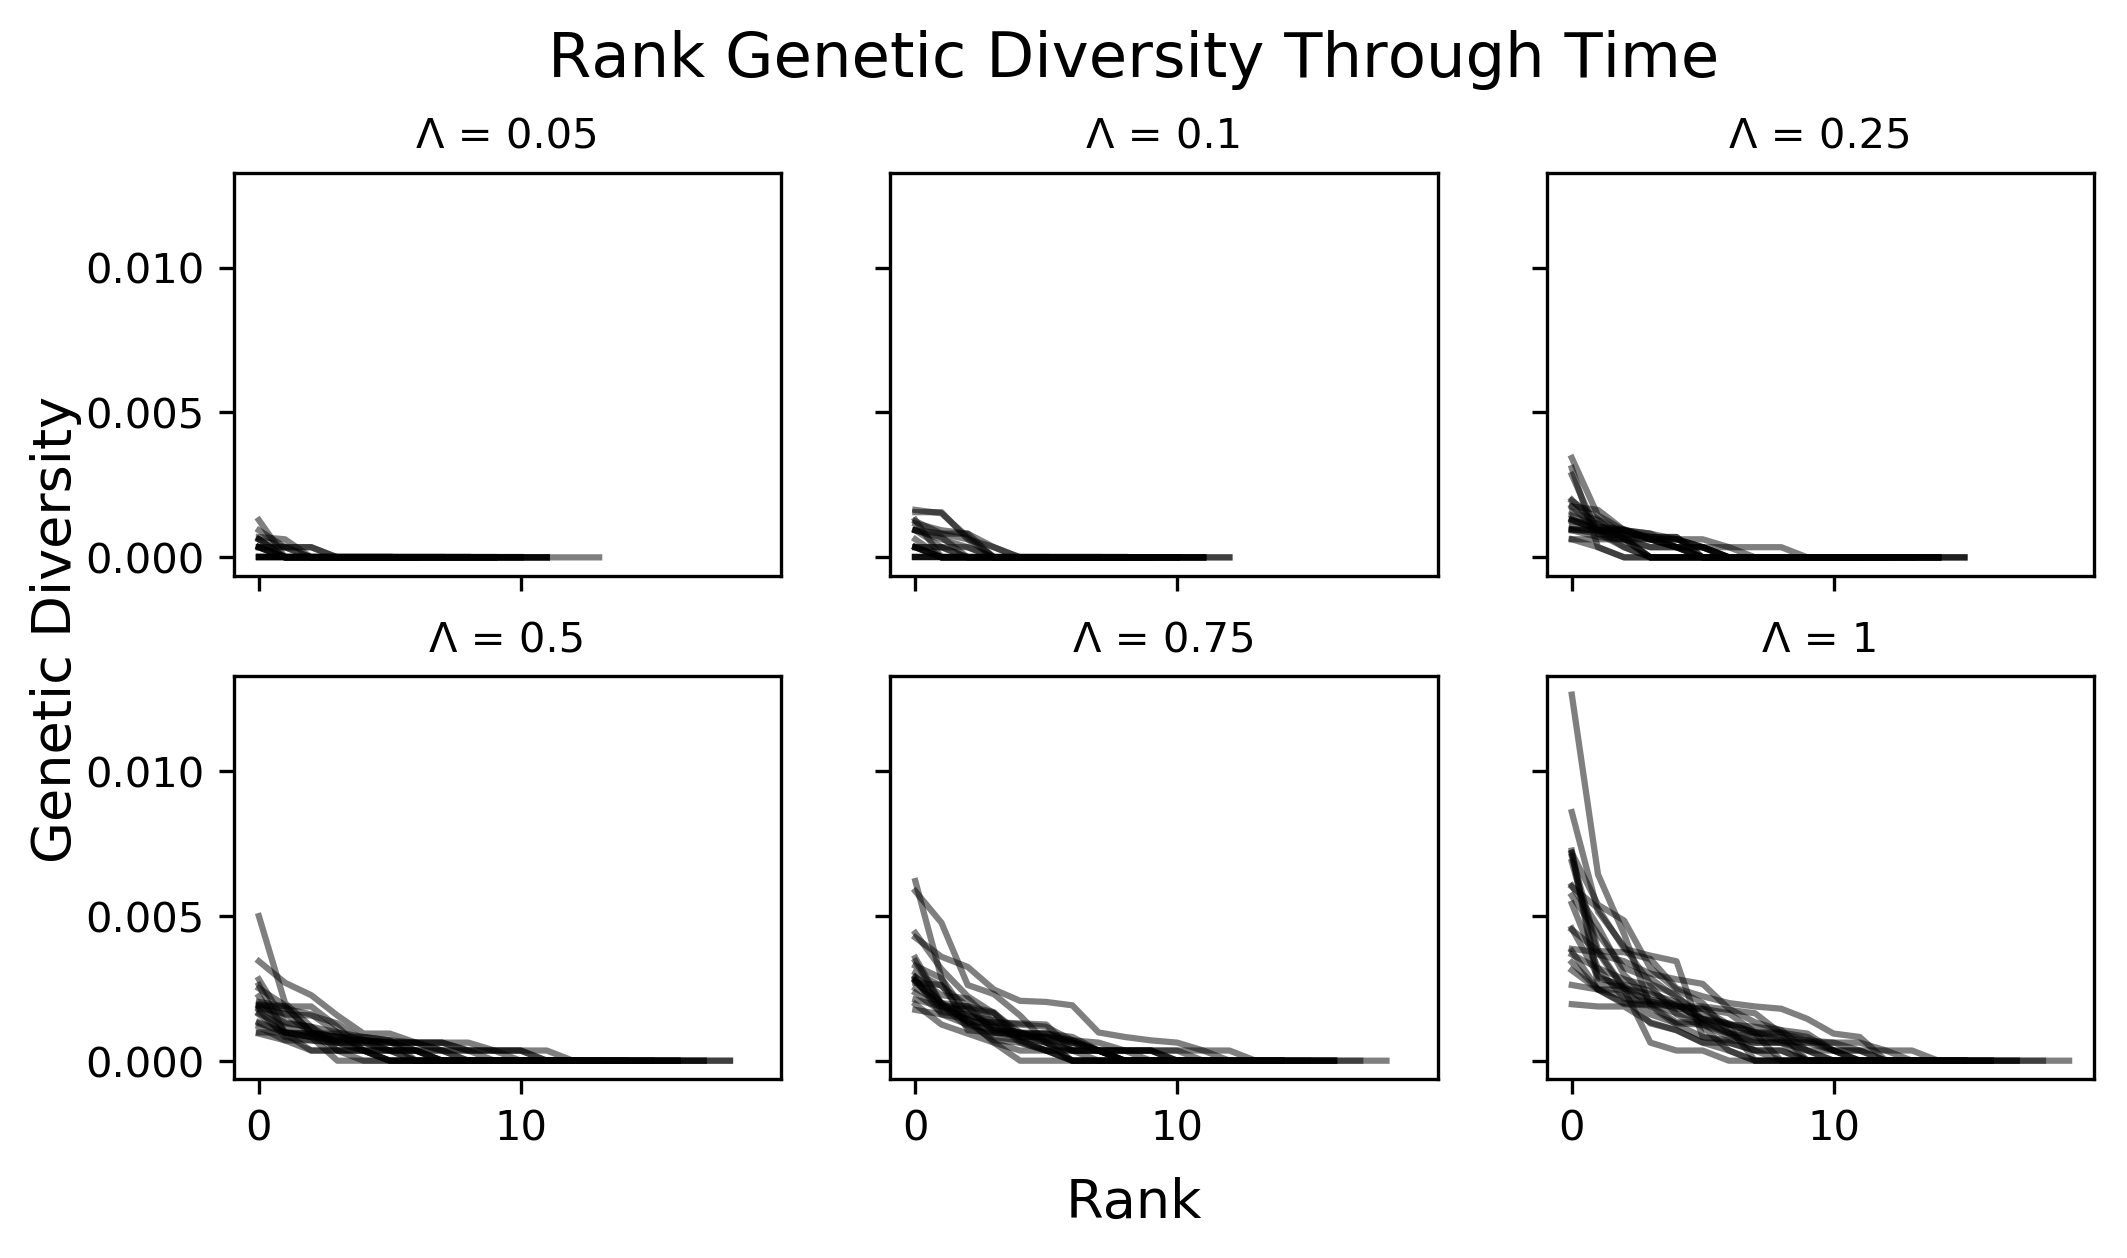

In [47]:
def plot_racs(megalogs, nsims=20):
    lambda_dict = populate_lambda_dists(megalogs, abund=True)

    f, axarr = plt.subplots(2, 3, figsize=(8,4), dpi=300, sharex=True, sharey=True)
    axarr = [a for b in axarr for a in b]
    for i, k, ax in zip(range(0,6), lambdas, axarr):
        ax.set_title(u"Λ = {}".format(k), fontsize=10)
        for l in lambda_dict[k][:20]:
            abunds = sorted(l["pi_local"], reverse=True)
            xs = range(len(abunds))
            ax.plot(xs, abunds, c='black', alpha=0.5)
    f.text(0.5, 0.01, u"Rank", ha='center', fontsize=13)
    f.text(0.04, 0.5, u"Genetic Diversity", va='center', rotation='vertical', fontsize=13)
    plt.suptitle("Rank Genetic Diversity Through Time", y=.9999, fontsize=15)
    plt.subplots_adjust(hspace=.25)
    plt.savefig("RACs.png")
plot_racs(megalogs)

In [40]:
lambda_dict = populate_lambda_dists(megalogs, abund=True)
print(megalogs[:10])
#abunds = sorted(lambda_dict[0.75]["abundance"], reverse=True)
#xs = range(len(abunds))
#ax.plot(xs, abunds)
abunds
lambda_dict[0.05][0]

[100, 180, 100, 100, 100, 100]
['/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-808992944/Loc1-0.762-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-705430764/Loc1-0.255-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-698271850/Loc1-0.062-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-833942236/Loc1-0.114-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-332254438/Loc1-0.052-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-732853716/Loc1-0.752-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-82938535/Loc1-0.101-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-442770715/Loc1-0.057-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-136487789/Loc1-0.263-megalog.txt', '/home/isaac/Continuosity/MESS/MESS/default_MESS/wat-788251258/Loc1-0.259-megalog.txt']


,name,trait,abundance,Ne_local,Ne_meta,tdiv,tree,growth_rate,migration_rate,segsites_tot,pi_tot,segsites_local,segsites_meta,pi_local,pi_meta,dxy,da,TajimaD
0,t77,-4.259784,3,2000.000000,27506,2298,(t77:5.53101);,0,4.351610e-07,8,0.003832,0,7,0.000000,0.004094,0.005439,0.003392,0.00000
1,t44,-1.841315,8,3428.571429,98307,3504,(t44:5.53101);,0,4.161910e-07,10,0.003721,0,10,0.000000,0.005965,0.004386,0.001404,0.00000
2,t25,3.973998,1,2000.000000,608,1016,(t25:5.53101);,0,0.000000e+00,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.00000
3,t38,3.084453,12,3333.333333,72406,6468,(t38:5.53101);,0,3.710575e-07,8,0.003019,0,8,0.000000,0.005341,0.003333,0.000663,0.00000
4,t16,0.907703,2,2000.000000,56880,167,(t16:5.53101);,0,0.000000e+00,16,0.011616,0,16,0.000000,0.013177,0.016140,0.009552,0.00000
5,t14,-6.545027,4,2666.666667,4380,5356,(t14:5.53101);,0,0.000000e+00,5,0.002308,2,3,0.001287,0.002222,0.002807,0.001053,0.23045
6,t93,10.767900,2,3000.000000,13466,2421,(t93:5.53101);,0,1.376842e-07,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.00000
8,t72,3.172395,1,2000.000000,10373,900,(t72:5.53101);,0,0.000000e+00,1,0.000332,0,1,0.000000,0.000624,0.000351,0.000039,0.00000
9,t53,-3.459182,1,2000.000000,20376,7,(t53:5.53101);,0,0.000000e+00,2,0.001062,0,2,0.000000,0.000975,0.001579,0.001092,0.00000
10,t24,-5.731964,16,3500.000000,17680,4782,(t24:5.53101);,0,1.194957e-07,2,0.000351,0,2,0.000000,0.000702,0.000351,0.000000,0.00000
